Video Presentation: https://youtu.be/CNYYvMAEs9Q

# COGS 108 - Infant Mortality and GDP Per Capita

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

Our project works to determine if there is a negative correlation between increasing GDP per capita and infant morality rates. We carried further exploratory analysis, examining the possibility of change in correlation over time, how this correlation might differ between countries, and sex and global region as possible confounding variables. From our data analysis, we can confidently state that there is a negative correlation between increasing GDP per capita and a decrease in infant mortality rates, which was largely persistent over time, and across countries, sexes and regions.

# Names

- Steven Tsan
- Nandini Kapa
- Jeremy Luong
- Andrew Lee

<a id='research_question'></a>
# Research Question

**Does increasing GDP per capita correlate to a decrease in infant mortality rates?**

Sub questions: 
- How does this relationship change yearly from 1990 - 2020? 
- From 1990 - 2020, are there countries where GDP per capita is better or worse at predicting child mortality than the average? 
- Does child gender and global region affect the correlation between GDP per capita and infant mortality rates?

<a id='background'></a>

## Background & Prior Work

Infant mortality rate is often reported as having a negative correlation with a country's GDP [1]. A macroeconomic measurement, GDP may not be an explanatory variable for infant mortality, but may broadly capture other issues that impact infant mortality. Prior work has been done in order to explore how this relates to infant mortality and explore confounding variables such as education [1]. The topic of infant mortality is interesting as it is a good measurement of a country's "health status", with a strong correlation with individual income [3], which can be approximated by GDP per capita when scaling our observations to countries. 

Studies have shown that short-term drops in GDP correlate with sharp decreases of infant mortality rates [3] which affirms the sensitive correlation between GDP and infant mortality. However another study has also shown that sudden increases in GDP can correlate with short term increases in the mortality rates, though not specific to infants, but in the long-term mortality rates continue to decrease as GDP rises [2].

Rather than looking at the general decline of infant mortality rate with increasing GDP, some studies focused more on specific characteristics. The differences in infant mortality rates between ethnic groups could be explained by differences in wealth [4]. Research has also analyzed how income inequality in a country affects infant mortality rates by inspecting countries with similar GDPs but different levels of income inequality [5]. These findings showed that infant mortality rates were more affected by differences beween a countries top 5% than the poor's incomes.

References (include links):
- 1) Baird, Sarah, Jed Friedman, and Norbert Schady. "Aggregate income shocks and infant mortality in the developing world."
    Review of Economics and statistics 93.3 (2011): 847-856.
https://openknowledge.worldbank.org/bitstream/handle/10986/4916/rest_a_00084.pdf;sequence=1

- 2) Brenner, M. Harvey. "Commentary: Economic growth is the basis of mortality rate decline in the 20th century—experience of the United States 1901–2000." International journal of epidemiology 34.6 (2005): 1214-1221.
https://academic.oup.com/ije/article/34/6/1214/707388

- 3) O'Hare, Bernadette, et al. "Income and child mortality in developing countries: a systematic review and meta-analysis." Journal of the Royal Society of Medicine 106.10 (2013): 408-414.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3791093/

- 4) Victora, Cesar G., et al. "Association between ethnicity and under-5 mortality: analysis of data from demographic surveys from 36 low-income and middle-income countries." The Lancet Global Health 8.3 (2020): e352-e361.
https://childmortality.org/wp-content/uploads/2020/06/Victora-et-al.-2020-Association-between-ethnicity-and-under-5-mortality.pdf 

- 5) Waldmann, Robert J. "Income distribution and infant mortality." The Quarterly Journal of Economics 107.4 (1992): 1283-1302.
https://academic.oup.com/qje/article-abstract/107/4/1283/1846943


# Hypothesis


We hypothesize that an increasing GDP per capita does correlate to a decrease in infant mortality rates for all countries. GDP per capita is a good indicator of the state of a nation's economic health and nations that are more economically healthy have access to better healthcare. Thus, nations with a higher GDP per capita should be able to prevent infant deaths whereas a nation that does not have access to these resources would not be able to prevent them.

For our secondary sub-questions, we will perform exploratory data analysis, not hypothesis-driven analysis, on these ideas.

# Dataset(s)

**Dataset: Infant Mortality**
- Link: https://data.worldbank.org/indicator/SP.DYN.IMRT.IN, https://data.worldbank.org/indicator/SP.DYN.IMRT.MA.IN?name_desc=false, https://data.worldbank.org/indicator/SP.DYN.IMRT.FE.IN?name_desc=false
- Number of Observations: 16226
- Description: This dataset contains the yearly infant mortality rate for countries starting as early as 1960 (if possible) up until 2020. Separate datasets that also break this down by male/female are also provided.

**Dataset: GDP of all countries (1960-2020)**
- Link: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?fbclid=IwAR1O0iHmCGdKGWLcg-dTcgLwb42dDGJZfmuBeNmBFmfidBh78aWScIo0qWs
- Number of Observations: 16226
- Description: The data contains the yearly GDP per capita of countries starting as early as 1960 (if possible) up until 2020.

**How to use them:**
Reorganize our tables such that years go under a column, and male/female/both infant mortality rates are values under separate columns in the same dataframe, alongside the gdp per capita.

# Setup

In [1]:
import pandas as pd

In [2]:
gdp_data = pd.read_csv('data/gdp_per_capita.csv', header=2)
inf_mort_data = pd.read_csv('data/inf_mort.csv', header=2)
fem_mort_data = pd.read_csv('data/fem_inf_mort.csv', header=2)
male_mort_data = pd.read_csv('data/male_inf_mort.csv', header=2)

# Data Cleaning

We have 4 dataframes all from the world bank, so we just need to set up the table as we want (years all in one column, drop unnecessary columns, drop missing data and non countries) and merge them together.

Drop all columns that are unnecessary for data analysis.

In [3]:
gdp_data.drop(columns=['Indicator Code','Unnamed: 65','Indicator Name'], inplace=True)
inf_mort_data.drop(columns=['Indicator Code','Unnamed: 65','Indicator Name'], inplace=True)
fem_mort_data.drop(columns=['Indicator Code','Unnamed: 65','Indicator Name'], inplace=True)
male_mort_data.drop(columns=['Indicator Code','Unnamed: 65','Indicator Name'], inplace=True)

In [4]:
gdp_data.rename(columns={'Country Name':'country', 'Country Code':'code'}, inplace=True)
inf_mort_data.rename(columns={'Country Name':'country', 'Country Code':'code'}, inplace=True)
fem_mort_data.rename(columns={'Country Name':'country', 'Country Code':'code'}, inplace=True)
male_mort_data.rename(columns={'Country Name':'country', 'Country Code':'code'}, inplace=True)

Change the data format to follow rows (rather than columns) for the year.

In [5]:
gdp_data = gdp_data.melt(id_vars=['country','code'], var_name='year', value_name='gdp_per_capita')
inf_mort_data = inf_mort_data.melt(id_vars=['country','code'], var_name='year', value_name='mort_rate_both')
fem_mort_data = fem_mort_data.melt(id_vars=['country','code'], var_name='year', value_name='mort_rate_fem')
male_mort_data = male_mort_data.melt(id_vars=['country','code'], var_name='year', value_name='mort_rate_male')

In [6]:
inf_mort_data = inf_mort_data.merge(fem_mort_data, on=['country', 'year','code']).merge(male_mort_data, on=['country', 'year','code'])
inf_mort_data

,country,code,year,mort_rate_both,mort_rate_fem,mort_rate_male
0,Aruba,ABW,1960,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,NaN,NaN,NaN
2,Afghanistan,AFG,1960,NaN,NaN,NaN
3,Africa Western and Central,AFW,1960,NaN,NaN,NaN
4,Angola,AGO,1960,NaN,NaN,NaN
...,...,...,...,...,...,...
16221,Kosovo,XKX,2020,NaN,NaN,NaN
16222,"Yemen, Rep.",YEM,2020,45.7,41.5,49.8
16223,South Africa,ZAF,2020,25.8,23.6,27.8
16224,Zambia,ZMB,2020,41.7,37.8,45.3


Make sure country names between both datasets match.

In [7]:
countries_data1 = set(inf_mort_data.country.unique())
countries_data2 = set(gdp_data.country.unique())
countries_data1.symmetric_difference(countries_data2) # names that will be removed

set()

Merge the datasets.

In [8]:
df = pd.merge(inf_mort_data, gdp_data, on=['country', 'year','code'])
df.year = df.year.astype('int64')

Dataframe with NaN's (keep rows so long as at least one column (either mort rates or gdp per capita) has a value).

In [9]:
df_with_nan = df.dropna(how='all', subset=['mort_rate_both','mort_rate_fem','mort_rate_male','gdp_per_capita'])

Drop any rows with a NaN in any of the specified columns (mort rates, gdp per capita).

In [10]:
df = df.dropna(how='any', subset=['mort_rate_both','mort_rate_fem','mort_rate_male','gdp_per_capita'])
df

,country,code,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
13,Australia,AUS,1960,20.3,17.9,22.7,1810.619230
14,Austria,AUT,1960,37.3,32.7,41.6,935.460427
17,Belgium,BEL,1960,29.3,25.4,33.1,1273.691659
18,Benin,BEN,1960,184.3,170.8,197.2,93.022700
19,Burkina Faso,BFA,1960,156.6,145.5,167.1,68.424734
...,...,...,...,...,...,...,...
16219,World,WLD,2020,27.4,25.2,29.5,10918.722834
16220,Samoa,WSM,2020,14.6,13.1,16.1,4067.843459
16223,South Africa,ZAF,2020,25.8,23.6,27.8,5655.867654
16224,Zambia,ZMB,2020,41.7,37.8,45.3,985.132436


The dataset has rows for a variety of non-countries, so we'll create a separate dataframe with only rows for countries.

In [11]:
non_countries = [
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Arab World',
 'Caribbean small states',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Post-demographic dividend',
 'Pre-demographic dividend',
 'Small states',
 'South Asia',
 'South Asia (IDA & IBRD)',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'West Bank and Gaza',
 'World']

In [12]:
df_country_only = df[~df.country.isin(non_countries)] # make a separate dataframe that only has data for countries

In [13]:
df_country_only.head()

,country,code,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
13,Australia,AUS,1960,20.3,17.9,22.7,1810.619230
14,Austria,AUT,1960,37.3,32.7,41.6,935.460427
17,Belgium,BEL,1960,29.3,25.4,33.1,1273.691659
18,Benin,BEN,1960,184.3,170.8,197.2,93.022700
19,Burkina Faso,BFA,1960,156.6,145.5,167.1,68.424734


We notice later on in the first portion of the EDA that about  40% of countries provide both gdp per capita and infant mortality by 1960, but by 1990 about 80% do. To balance our desire to both have a long time frame and having as much data as possible, we make a separate dataframe that goes only from 1990 to 2020 to use when we need to ensure all our datapoints run across the same time frame.

In [14]:
countries_with_1990_data = df_country_only.groupby('country').year.min().index[(df_country_only.groupby('country').year.min() <= 1990)].tolist()
len(countries_with_1990_data)

169

In [15]:
df_1990_2020 = df_country_only[df_country_only.country.isin(countries_with_1990_data)]
df_1990_2020 = df_1990_2020[df_1990_2020.year >= 1990]
assert df_1990_2020.year.min() == 1990 and df_1990_2020.year.max() == 2020

# Data Analysis & Results

# I. Distribution and Outliers

## Data Availability

In [16]:
num_ctries = len(df_country_only.groupby('country'))
print(f'Num Countries in Dataset: {num_ctries}')

Num Countries in Dataset: 190


A quick google search states there are 195 countries in the world, so our dataset from the World Bank has info for almost all countries.

Because not all countries provided data for mortality rate and gdp per capita as far back as 1960, we measure the proportion of countries that are providing data at each year.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
starting_years = df_country_only.groupby('country').year.min()
start_yr_cts = np.bincount(list(starting_years))[1960:]
cum_cts = np.cumsum(start_yr_cts)
per_cum_cts = cum_cts / cum_cts.max()

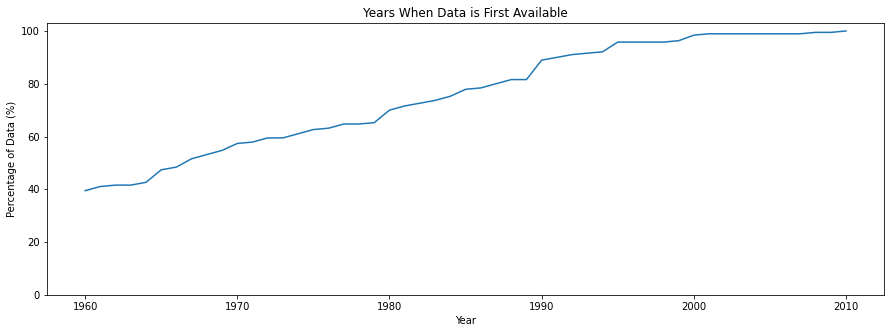

In [19]:
plt.figure(figsize=(15,5))
plt.plot(range(1960,2011), per_cum_cts * 100)
plt.ylim(ymin=0)
plt.title('Years When Data is First Available')
plt.xlabel('Year')
plt.ylabel('Percentage of Data (%)')
plt.show()

We note that most countries do not provide data for either infant mortality or gdp per capita starting at 1960 (roughly 40% of countries in our dataset do). But by 1990, about 80% of countries in the dataset is providing data.

## Data Distribution

In [20]:
df_country_only.describe()

,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
count,9114.000000,9114.000000,9114.000000,9114.000000,9114.000000
mean,1994.310731,46.747619,42.788995,50.505190,7621.881880
std,16.533198,42.952553,40.073709,45.724052,15231.846405
min,1960.000000,1.500000,1.400000,1.700000,20.039529
25%,1981.000000,12.800000,11.500000,14.100000,555.394825
50%,1996.000000,31.650000,28.400000,34.750000,1835.698095
75%,2008.000000,70.000000,63.775000,76.200000,7019.348881
max,2020.000000,237.500000,225.800000,248.400000,189487.147128


Here we get descriptive statistics for all columns in the dataframe without regards to grouping by country and change in years. We see that the mortality rates and gdp per capita have vast ranges. Because we need to be considerate of the fact that we have time series data, below we will inspect how these values change if we group our data by country.

In [21]:
df_country_only.groupby('country').mean()[['mort_rate_both','mort_rate_fem','mort_rate_male','gdp_per_capita']].describe()

,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
count,190.000000,190.000000,190.000000,190.000000
mean,44.541670,40.712350,48.177928,7612.679493
std,34.353388,31.901847,36.714038,12627.404856
min,2.980952,2.723810,3.219048,170.796856
25%,14.265732,12.962972,15.250447,985.183649
50%,34.552146,31.281010,37.118233,2550.467308
75%,68.909426,63.638525,73.781967,9603.120718
max,151.168852,140.986885,160.847541,121030.545336


We group observations by country, and average the values for mortality rate and gdp per capita for all years where data is available per country. We see the average values still vary significantly. Because it is difficult to account for change in years in this table, we will use line plots and chloropleths below.

In [57]:
df_country_only.groupby('country').median()[['mort_rate_both','mort_rate_fem','mort_rate_male','gdp_per_capita']].describe()

,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
count,190.000000,190.000000,190.000000,190.000000
mean,41.001842,37.354211,44.454737,6649.789064
std,35.439428,32.904445,37.865367,11298.667113
min,2.700000,2.500000,2.900000,88.087470
25%,11.700000,10.325000,12.875000,710.852841
50%,28.500000,25.450000,31.500000,2029.406018
75%,62.275000,57.950000,66.250000,8967.372311
max,160.300000,152.600000,167.400000,105261.703329


Since our data is likely skewed we group by country and describe the median. We again note the large range of possible values, and that compared to the description of the mean from the prior table that the median values are lower indicating a right skew in our data.

Below we plot some histograms for every 5 years from 1990 to 2020 to see how our data distribution evolves over time.

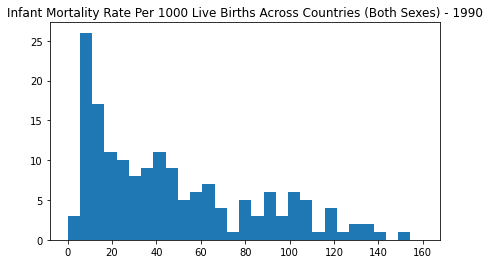

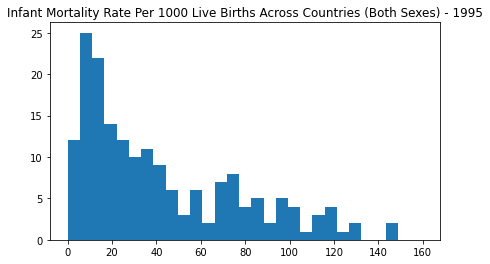

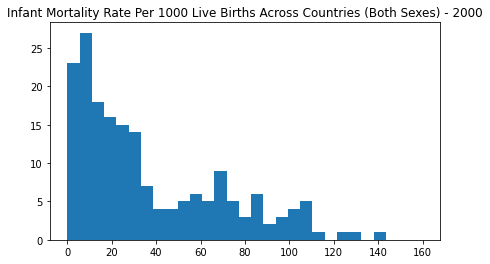

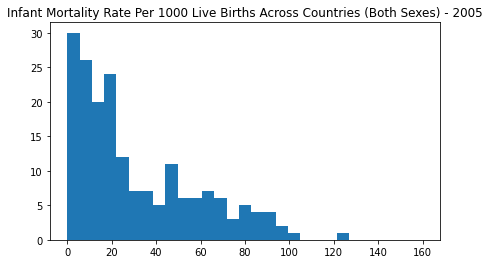

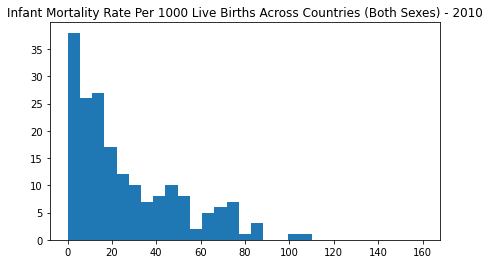

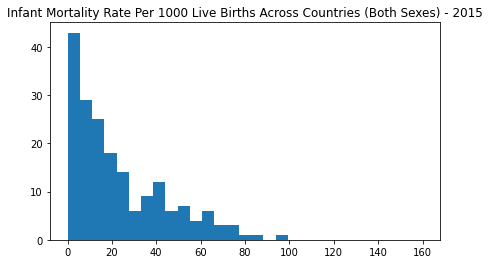

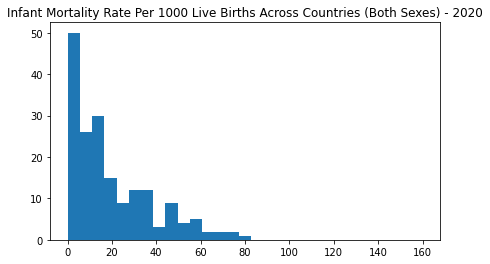

In [22]:
bins = np.linspace(0, 160, 30)
for i, yr in enumerate(range(1990, 2021, 5)):
    plt.figure(figsize=(7,4))
    yr_mort = df_country_only[df_country_only.year == yr].mort_rate_both
    plt.hist(yr_mort, bins=bins)
    plt.title(f'Infant Mortality Rate Per 1000 Live Births Across Countries (Both Sexes) - {yr}')
    plt.show()

We plot the distribution of infant mortality rates per 1000 live births every 5 years from 1990 to 2020. We see the distribution is right skewed every year indicating that most countries have lower infant mortality rates but some have significantly higher rates. The right tail shifts left as the years progress indicating a decrease in infant mortality rates over time.

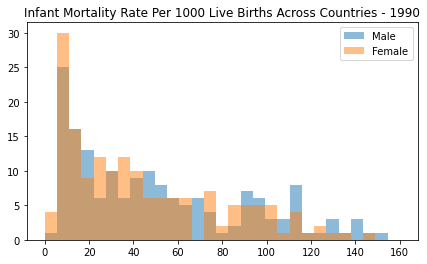

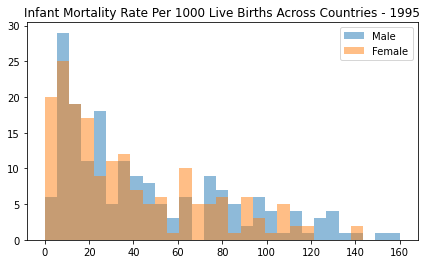

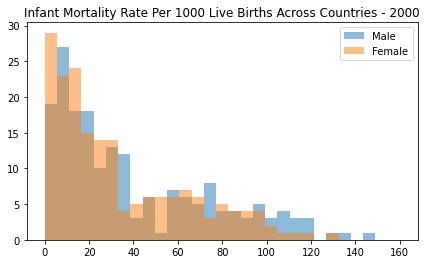

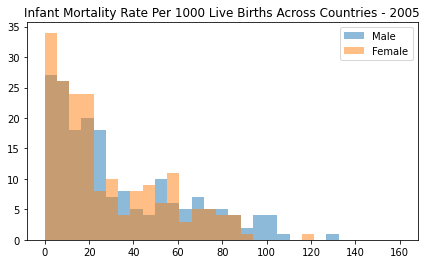

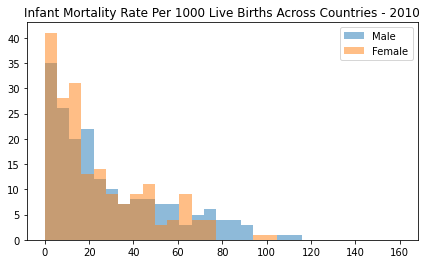

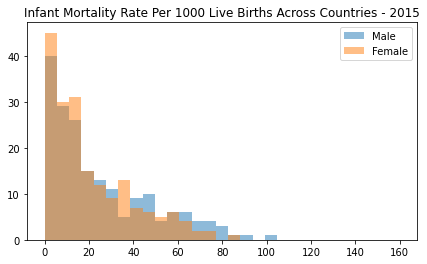

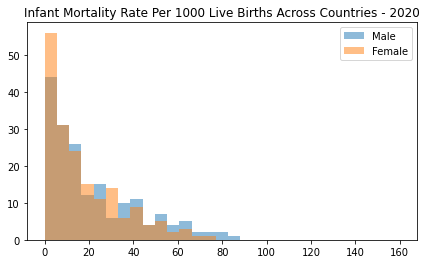

In [23]:
bins = np.linspace(0, 160, 30)
for i, yr in enumerate(range(1990, 2021, 5)):
    plt.figure(figsize=(7,4))
    yr_mort_male = df_country_only[df_country_only.year == yr].mort_rate_male
    yr_mort_fem = df_country_only[df_country_only.year == yr].mort_rate_fem
    plt.hist(yr_mort_male, bins=bins, alpha=0.5, label = 'Male')
    plt.hist(yr_mort_fem, bins=bins, alpha=0.5, label = 'Female')
    plt.title(f'Infant Mortality Rate Per 1000 Live Births Across Countries - {yr}')
    plt.legend()
    plt.show()

We perform the same plotting procedure as the prior graphs except we differentiate between male and female mortality rates. While they both follow the same trend over time, we note that female infant mortality rate tends to be lower.

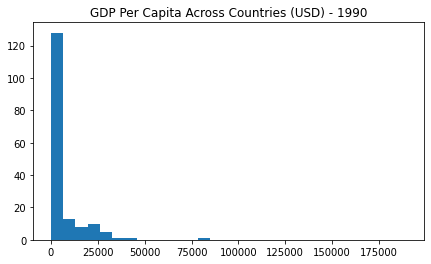

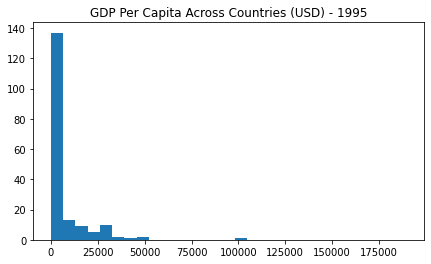

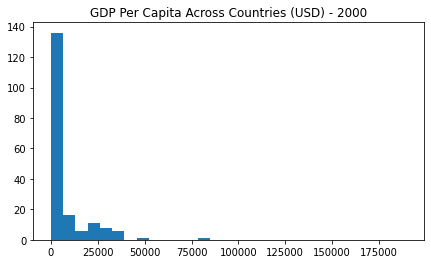

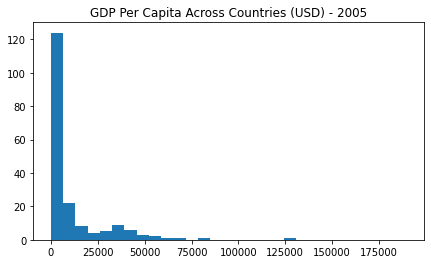

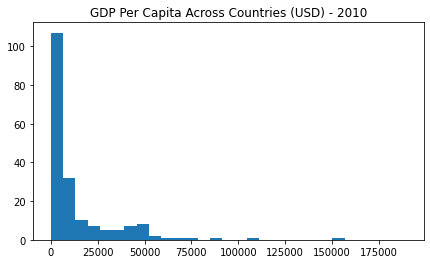

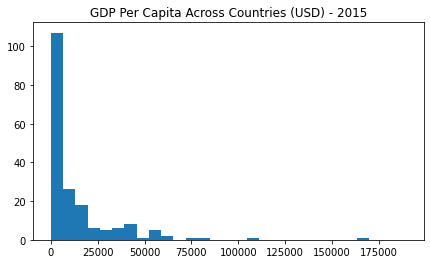

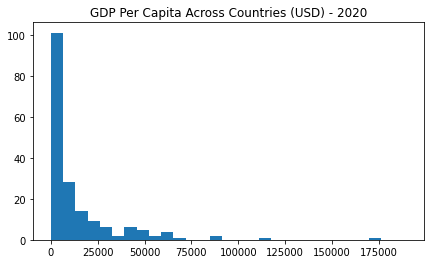

In [24]:
bins = np.linspace(0, int(max(df_1990_2020.gdp_per_capita)), 30)
for i, yr in enumerate(range(1990, 2021, 5)):
    plt.figure(figsize=(7,4))
    gdp = df_country_only[df_country_only.year == yr].gdp_per_capita
    plt.hist(gdp, bins=bins)
    plt.title(f'GDP Per Capita Across Countries (USD) - {yr}')
    plt.show()

GDP per capita across countries is right skewed with a few outliers that are really far out to the right. Over time we notice that the distribution shifts right indicating a sizeable amount of countries experienced a growing GDP per capita.

## Outlier Checks

In [25]:
country_median = df_country_only.groupby('country').median()
iqr_mort_rate_both = country_median[['mort_rate_both']].describe().loc['75%'] - country_median[['mort_rate_both']].describe().loc['25%']
iqr_mort_rate_fem = country_median[['mort_rate_fem']].describe().loc['75%'] - country_median[['mort_rate_fem']].describe().loc['25%']
iqr_mort_rate_male = country_median[['mort_rate_male']].describe().loc['75%'] - country_median[['mort_rate_male']].describe().loc['25%']
iqr_gdp_per_capita = country_median[['gdp_per_capita']].describe().loc['75%'] - country_median[['gdp_per_capita']].describe().loc['25%']

In [26]:
q1 = country_median[['mort_rate_both']].describe().loc['25%']
q3 = country_median[['mort_rate_both']].describe().loc['75%']
mort_rate_lower_both = q1 - 1.5 * iqr_mort_rate_both
mort_rate_higher_both = q3 + 1.5 * iqr_mort_rate_both
outlier_low_mort_rate_both = country_median[country_median.mort_rate_both < float(mort_rate_lower_both)]
outlier_high_mort_rate_both = country_median[country_median.mort_rate_both > float(mort_rate_higher_both)]

In [27]:
q1 = country_median[['mort_rate_male']].describe().loc['25%']
q3 = country_median[['mort_rate_male']].describe().loc['75%']
mort_rate_lower_male = q1 - 1.5 * iqr_mort_rate_male
mort_rate_higher_male = q3 + 1.5 * iqr_mort_rate_male
outlier_low_mort_rate_male = country_median[country_median.mort_rate_male < float(mort_rate_lower_male)]
outlier_high_mort_rate_male = country_median[country_median.mort_rate_male > float(mort_rate_higher_male)]

In [28]:
q1 = country_median[['mort_rate_fem']].describe().loc['25%']
q3 = country_median[['mort_rate_fem']].describe().loc['75%']
mort_rate_lower_fem = q1 - 1.5 * iqr_mort_rate_fem
mort_rate_higher_fem = q3 + 1.5 * iqr_mort_rate_fem
outlier_low_mort_rate_fem = country_median[country_median.mort_rate_fem < float(mort_rate_lower_fem)]
outlier_high_mort_rate_fem = country_median[country_median.mort_rate_fem > float(mort_rate_higher_fem)]

In [29]:
outlier_low_mort_rate_both

,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
country,,,,,


In [30]:
outlier_high_mort_rate_both

,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
country,,,,,
Afghanistan,1980.5,160.3,152.6,167.4,233.128157
Sierra Leone,1990.0,154.4,143.7,164.5,219.294602


In [31]:
outlier_low_mort_rate_male

,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
country,,,,,


In [32]:
outlier_high_mort_rate_male

,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
country,,,,,
Afghanistan,1980.5,160.3,152.6,167.4,233.128157
Sierra Leone,1990.0,154.4,143.7,164.5,219.294602


In [33]:
outlier_low_mort_rate_fem

,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
country,,,,,


In [34]:
outlier_high_mort_rate_fem

,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
country,,,,,
Afghanistan,1980.5,160.3,152.6,167.4,233.128157
Sierra Leone,1990.0,154.4,143.7,164.5,219.294602


Since our variables are skewed we check for outliers using the 1.5 IQR rule using the median as the measure of central tendency. We see that Sierra Leone and Afghanistan are the only outliers in terms of infant mortality rate. Both countries had higher infant mortality rates than other countries for both male and female infants. Causes were due to lack of clean water and access to medical practice in Sierra Leone with lack of medical practice being with biggest contributing factor in Afghanistan (https://pubmed.ncbi.nlm.nih.gov/3764488/, https://www.harvardunicef.org/blog/the-infant-mortality-rate-what-it-says-about-afghanistans-health-system)

In [35]:
q1 = country_median[['gdp_per_capita']].describe().loc['25%']
q3 = country_median[['gdp_per_capita']].describe().loc['75%']
gdp_lower = q1 - 1.5 * iqr_gdp_per_capita
gdp_higher = q3 + 1.5 * iqr_gdp_per_capita
outlier_low_gdp_per_capita = country_median[country_median.gdp_per_capita < float(gdp_lower)]
outlier_high_gdp_per_capita = country_median[country_median.gdp_per_capita > float(gdp_higher)]

In [36]:
outlier_low_gdp_per_capita

,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
country,,,,,


In [37]:
outlier_high_gdp_per_capita

,year,mort_rate_both,mort_rate_fem,mort_rate_male,gdp_per_capita
country,,,,,
Andorra,2002.0,6.50,5.80,7.2,25067.240064
Austria,1990.0,8.00,7.10,8.9,21680.989623
Denmark,1993.0,6.10,5.30,6.7,29569.660357
Finland,1990.0,5.50,5.00,6.1,22047.793322
France,1990.0,7.50,6.30,8.6,21675.064989
Germany,1995.0,5.30,4.60,5.9,25522.629573
Iceland,1990.0,5.20,4.70,5.6,24018.631182
Japan,1990.0,4.60,4.20,4.9,25371.464171
Luxembourg,1990.0,7.40,6.60,8.2,33465.478208


In [38]:
len(outlier_high_gdp_per_capita)

17

We can see there are 17 countries that are outliers by having a really high median GDP Per Capita, mostly composed of western countries, a few Arab countries and Japan.

# II. Trends and Correlations

## Correlation between Year, GDP Per Capita, and Infant Mortality Rate Per 1000 Live Births

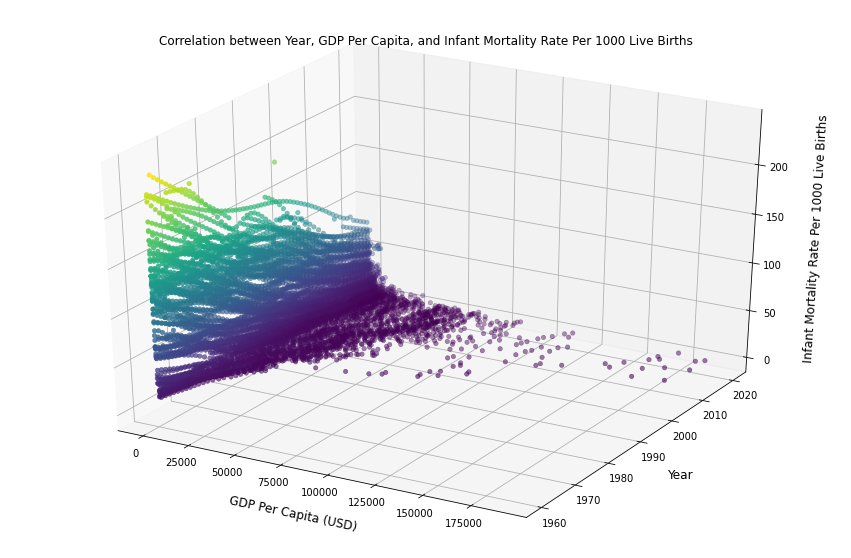

In [39]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(df_country_only.gdp_per_capita, df_country_only.year, df_country_only.mort_rate_both, c=df_country_only.mort_rate_both, cmap='viridis', linewidth=0.5);
plt.title('Correlation between Year, GDP Per Capita, and Infant Mortality Rate Per 1000 Live Births')
ax.set_xlabel('GDP Per Capita (USD)', fontsize=12, labelpad=15)
ax.set_ylabel('Year', fontsize=12, labelpad=15)
ax.set_zlabel('Infant Mortality Rate Per 1000 Live Births', fontsize=12, labelpad=15)
plt.show()

This graph shows the relationship of GDP per capita, mortality rate per 1000 live births and year for the datapoints across all countries. However, this graph is noisy due to the quantity of data and the large range our values can take, so below we filter out some datapoints with high GDP per capita to get a better look at the more concentrated region of points.

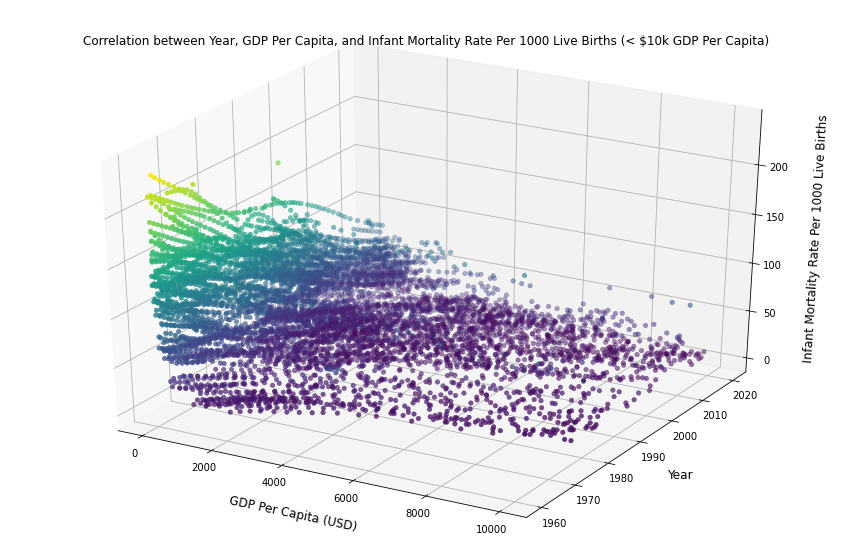

In [40]:
df_tmp = df_country_only[df_country_only["gdp_per_capita"] < 10000]
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(df_tmp.gdp_per_capita, df_tmp.year, df_tmp.mort_rate_both, c=df_tmp.mort_rate_both, cmap='viridis', linewidth=0.5);
plt.title('Correlation between Year, GDP Per Capita, and Infant Mortality Rate Per 1000 Live Births (< $10k GDP Per Capita)')
ax.set_xlabel('GDP Per Capita (USD)', fontsize=12, labelpad=15)
ax.set_ylabel('Year', fontsize=12, labelpad=15)
ax.set_zlabel('Infant Mortality Rate Per 1000 Live Births', fontsize=12, labelpad=15)
plt.show()

We can see by the above two graphs that there appears to be a negative correlation between mortality rate and both time and GDP per capita. As time progresses, the mortality rate per 1000 live births decreases with a constant GDP per capita. Simutaneously, we observe that a higher GDP per capita regardless of year tends to result in a lower mortality rate per 1000 live births.

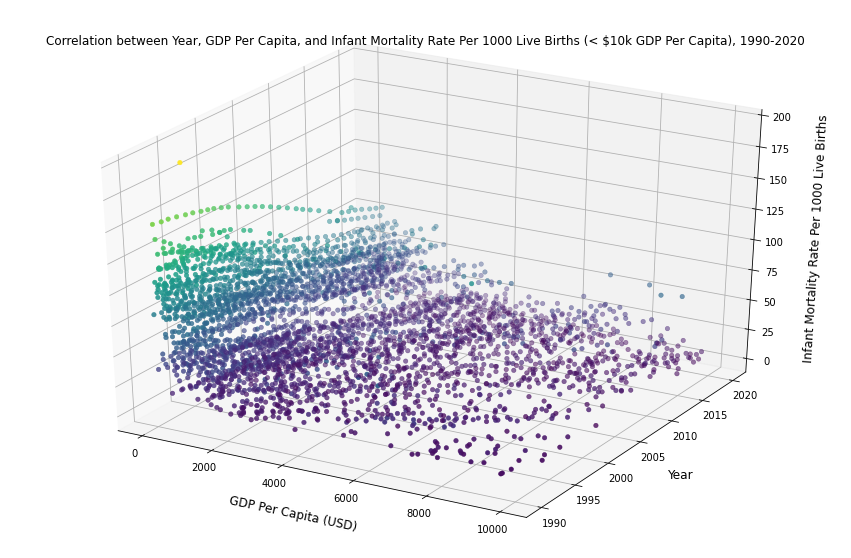

In [41]:
df_tmp = df_1990_2020[df_1990_2020["gdp_per_capita"] < 10000]
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(df_tmp.gdp_per_capita, df_tmp.year, df_tmp.mort_rate_both, c=df_tmp.mort_rate_both, cmap='viridis', linewidth=0.5);
plt.title('Correlation between Year, GDP Per Capita, and Infant Mortality Rate Per 1000 Live Births (< $10k GDP Per Capita), 1990-2020')
ax.set_xlabel('GDP Per Capita (USD)', fontsize=12, labelpad=15)
ax.set_ylabel('Year', fontsize=12, labelpad=15)
ax.set_zlabel('Infant Mortality Rate Per 1000 Live Births', fontsize=12, labelpad=15)
plt.show()

We see that the prior trends are still the same if we check only our data from 1990 to 2020.

## Countries with Negatively Correlated GDP Per Capita and Infant Mortality Rate

In [42]:
correlations = df_1990_2020.groupby('country')[['gdp_per_capita','mort_rate_both']].corr().iloc[0::2,-1]
correlations = pd.DataFrame(correlations).reset_index().drop(columns='level_1').rename(columns={'mort_rate_both':'correlation'})

In [43]:
import geopandas as gpd

In [44]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[['iso_a3','geometry']].rename(columns={'iso_a3':'code'})
df_1990_2020 = df_1990_2020.merge(world, on='code')

In [45]:
df_corr1 = df_1990_2020[df_1990_2020.year == 1990][['country','geometry']].merge(correlations, on='country')

From the above analysis we saw that there is typically a negative correlation between GDP per capita and infant mortality rates. In order to see how this differs across countries we plot the Pearson correlation of all countries from 1990 to 2020 in a chloropleth.

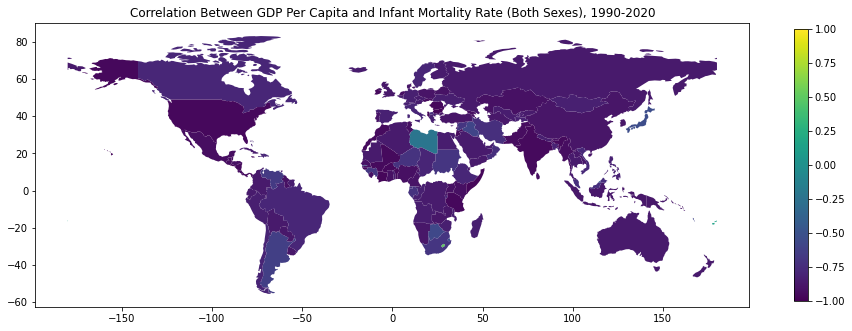

In [46]:
gdf = gpd.GeoDataFrame(df_corr1)
ax = gdf.plot(kind='geo', column='correlation', legend=True, legend_kwds={'shrink': 0.5}, figsize=(16,10), vmin=-1, vmax=1)
ax.set_title(f'Correlation Between GDP Per Capita and Infant Mortality Rate (Both Sexes), 1990-2020')
plt.show()

Values correspond to the correlation between GDP per capita and infant mortality rate, so a negative value means that as GDP per capita increases, infant mortality decreases. We see from this plot that for the vast majority of countries, an increase in GDP per capita has a very negative correlation with infant mortality rate.

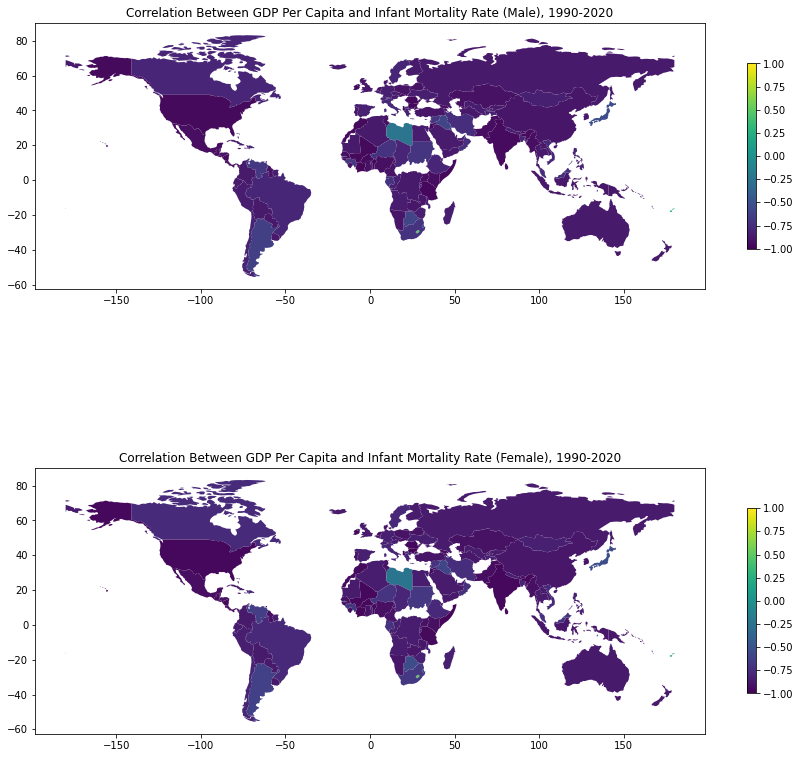

In [47]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))

correlations = df_1990_2020.groupby('country')[['gdp_per_capita','mort_rate_male']].corr().iloc[0::2,-1]
correlations = pd.DataFrame(correlations).reset_index().drop(columns='level_1').rename(columns={'mort_rate_male':'correlation'})
df_corr = df_1990_2020[df_1990_2020.year == 1990][['country','geometry']].merge(correlations, on='country')
gdf = gpd.GeoDataFrame(df_corr)
gdf.plot(kind='geo', column='correlation', legend=True, legend_kwds={'shrink': 0.5}, figsize=(16,10), vmin=-1, vmax=1, ax=ax1)
ax1.set_title(f'Correlation Between GDP Per Capita and Infant Mortality Rate (Male), 1990-2020')

correlations = df_1990_2020.groupby('country')[['gdp_per_capita','mort_rate_fem']].corr().iloc[0::2,-1]
correlations = pd.DataFrame(correlations).reset_index().drop(columns='level_1').rename(columns={'mort_rate_fem':'correlation'})
df_corr = df_1990_2020[df_1990_2020.year == 1990][['country','geometry']].merge(correlations, on='country')
gdf = gpd.GeoDataFrame(df_corr)
gdf.plot(kind='geo', column='correlation', legend=True, legend_kwds={'shrink': 0.5}, figsize=(16,10), vmin=-1, vmax=1, ax=ax2)
ax2.set_title(f'Correlation Between GDP Per Capita and Infant Mortality Rate (Female), 1990-2020')

plt.show()

We note that there are no noticeable differences in the correlation rate across countries regardless of sex.

In [48]:
df_corr1[df_corr1.correlation >= 0]

,country,geometry,correlation
44,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.149493
77,Lesotho,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257...",0.512813


We observe that almost every country sees a negative correlation except for Fiji and Lesotho. We take a closer look at the trends for these two countries below.

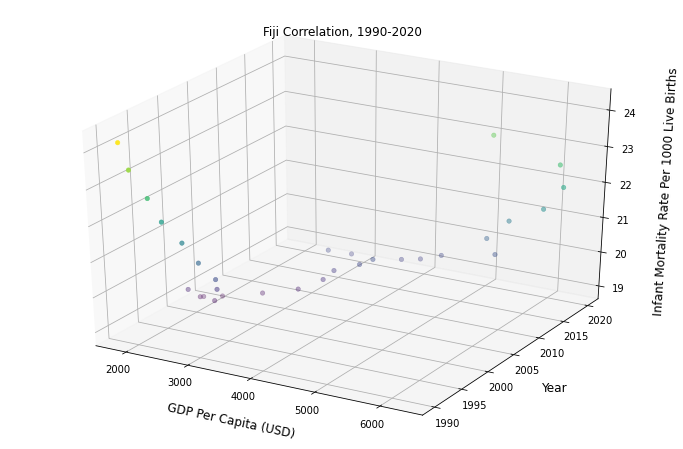

In [49]:
df_tmp = df_1990_2020[df_1990_2020.country == 'Fiji']
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter(df_tmp.gdp_per_capita, df_tmp.year, df_tmp.mort_rate_both, c=df_tmp.mort_rate_both, cmap='viridis', linewidth=0.5)
plt.title('Fiji Correlation, 1990-2020')
ax.set_xlabel('GDP Per Capita (USD)', fontsize=12, labelpad=15)
ax.set_ylabel('Year', fontsize=12, labelpad=15)
ax.set_zlabel('Infant Mortality Rate Per 1000 Live Births', fontsize=12, labelpad=15)
plt.show()

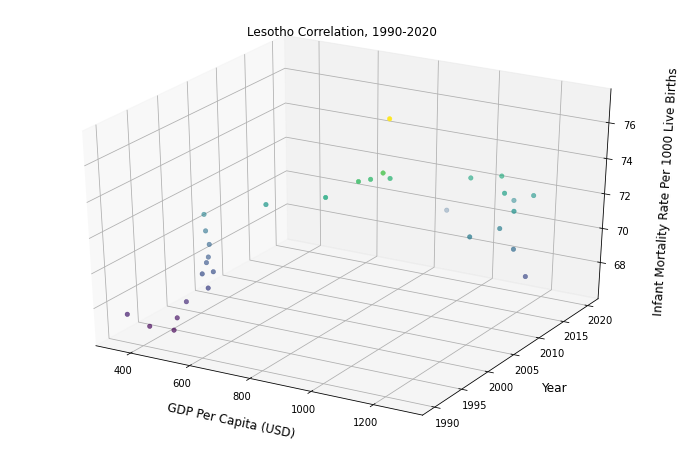

In [50]:
df_tmp = df_1990_2020[df_1990_2020.country == 'Lesotho']
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter(df_tmp.gdp_per_capita, df_tmp.year, df_tmp.mort_rate_both, c=df_tmp.mort_rate_both, cmap='viridis', linewidth=0.5)
plt.title('Lesotho Correlation, 1990-2020')
ax.set_xlabel('GDP Per Capita (USD)', fontsize=12, labelpad=15)
ax.set_ylabel('Year', fontsize=12, labelpad=15)
ax.set_zlabel('Infant Mortality Rate Per 1000 Live Births', fontsize=12, labelpad=15)
plt.show()
# sns.lineplot(x="gdp_per_capita", y="mort_rate_both", hue="country", data=df_1990_2020[(df_1990_2020.country == 'Fiji')])

From the above 2 graphs, we see this positive correlation is not due to any singular outlying event and there may be some phenomenon happening in these countries which is driving this positive correlation. Main causes can be attributed to lack of clean water and malnutrition (https://www.unicef.org/pacificislands/media/821/file/Fiji.pdf). Some other contributing factors may have been HIV/AIDs and increased birth rates by much younger and older women, ages below 18 and over 35 (https://uaps2015.princeton.edu/papers/151019).

## GDP Per Capita Change by Year

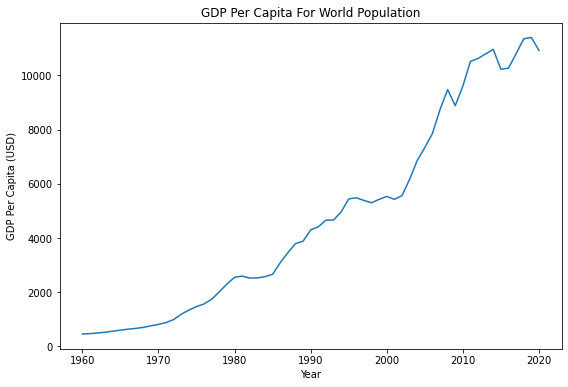

In [51]:
plt.figure(figsize=(9,6))
fig = plt.plot(df_with_nan[df_with_nan.country == 'World'].year, df_with_nan[df_with_nan.country == 'World'].gdp_per_capita)
plt.title('GDP Per Capita For World Population')
plt.xlabel("Year")
plt.ylabel("GDP Per Capita (USD)")
plt.show()

We see that GDP has drastically and fairly consistently increased over the years since 1960.

Because we're interested in how these features changed over time while taking into account that our data has many countries, we make a chloropleth for every 5 years from 1990 to 2020 (most recent year in our dataset). We choose 1990 to balance between data availability and having a long time frame.

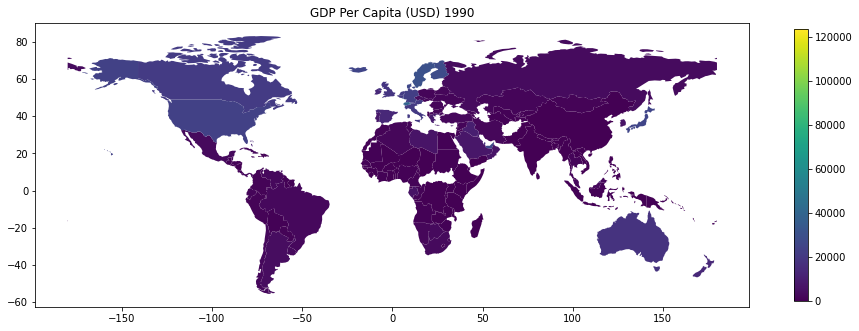

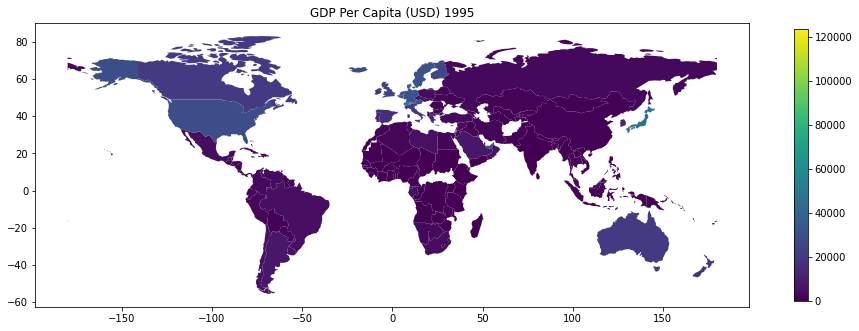

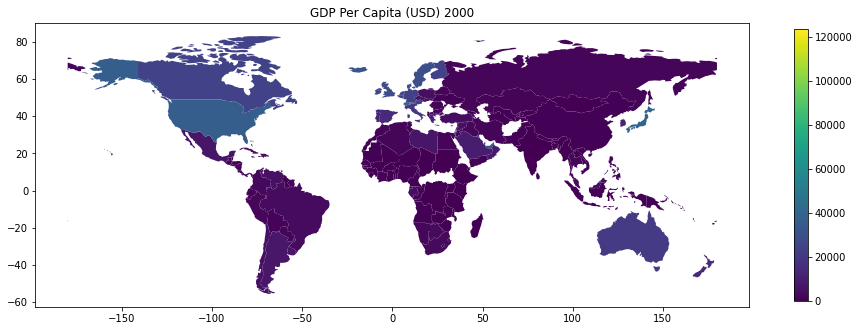

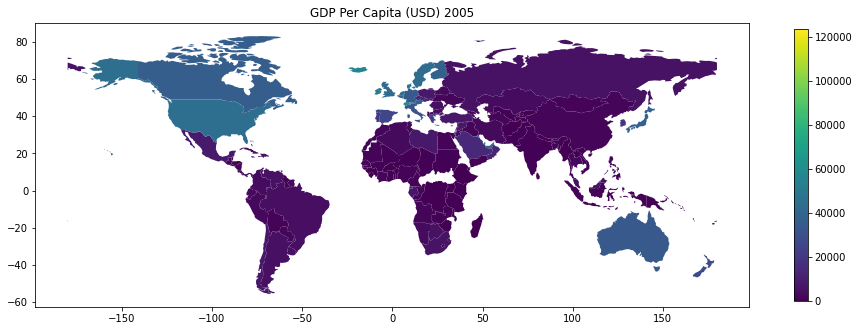

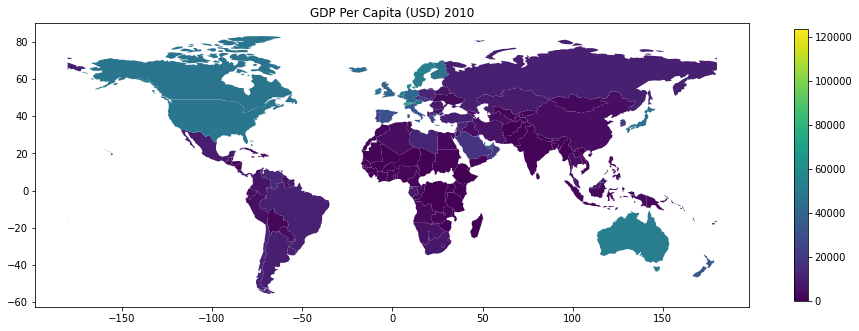

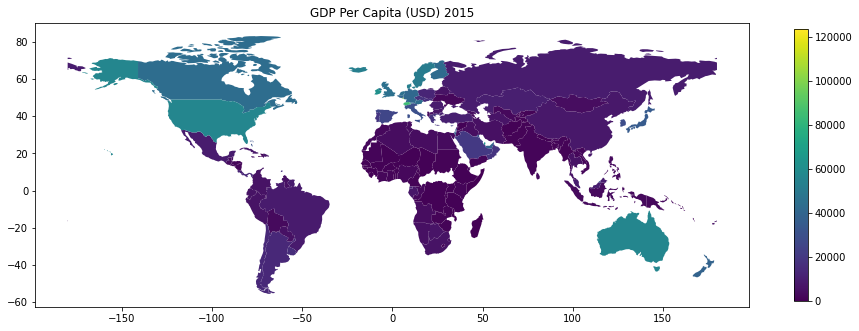

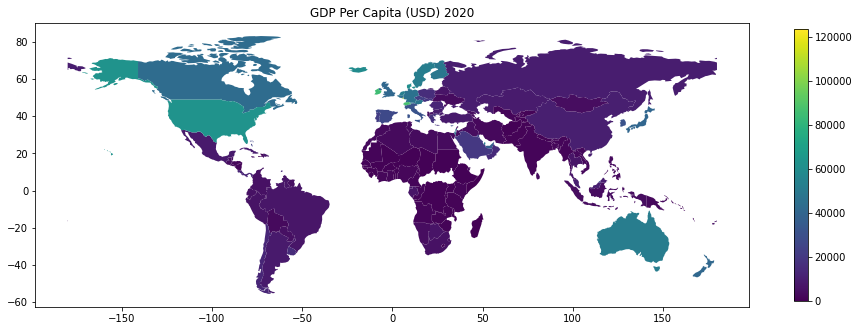

In [52]:
vmin, vmax = 0, df_1990_2020.gdp_per_capita.max()
for yr in range(1990, 2021, 5):
    gdf = gpd.GeoDataFrame(df_1990_2020[df_1990_2020.year == yr])
    ax = gdf.plot(kind='geo', column='gdp_per_capita', legend=True, legend_kwds={'shrink': 0.5}, figsize=(16,10), vmin=vmin, vmax=vmax)
    ax.set_title(f'GDP Per Capita (USD) {yr}')

At a glance we see some region have significantly higher GDP Per Capita (North America, Western Europe, Scandinavia, Australia and New Zealand, Japan). In general GDP per capita is increasing globally, but significantly more for some countries than others.

## Yearly Infant Mortality Rate per 1000 Live Births

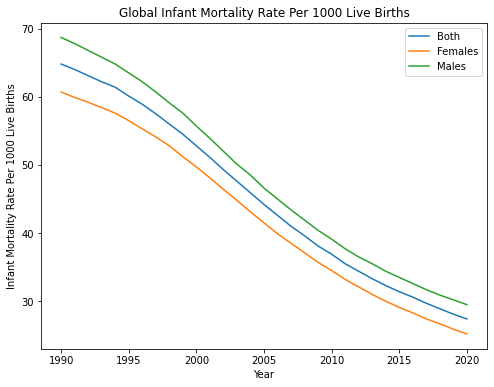

In [53]:
plt.figure(figsize=(8,6))
plt.plot(df[df.country == 'World'].year, df[df.country == 'World'].mort_rate_both, label = "Both")
plt.plot(df[df.country == 'World'].year, df[df.country == 'World'].mort_rate_fem, label = "Females")
plt.plot(df[df.country == 'World'].year, df[df.country == 'World'].mort_rate_male, label = "Males")
plt.title('Global Infant Mortality Rate Per 1000 Live Births')
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rate Per 1000 Live Births')
plt.legend()
plt.show()

Males have a noticeably higher infant mortality rate. We note that there are publications proporting as to why this might be (biological reasons). https://pubmed.ncbi.nlm.nih.gov/23151996/#:~:text=Infant%20mortality%20is%20higher%20in,to%20diseases%20and%20premature%20death. We also note that except for the difference in mortality rate, the overall downward trend for both male and female is similar.

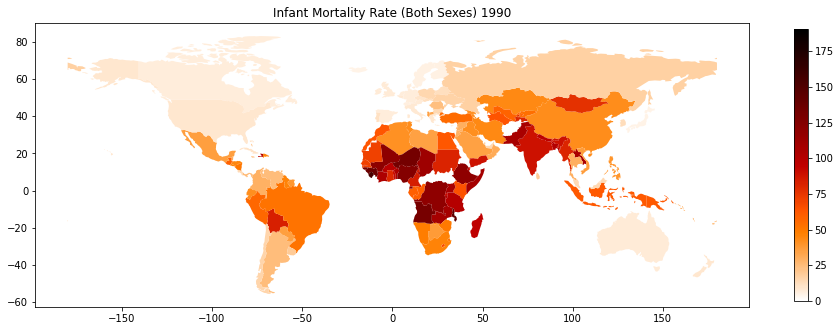

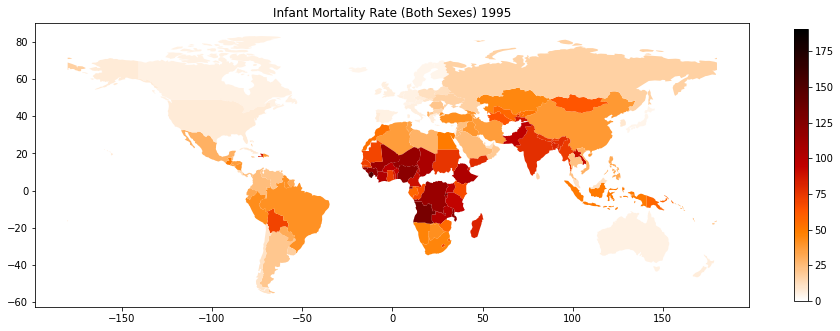

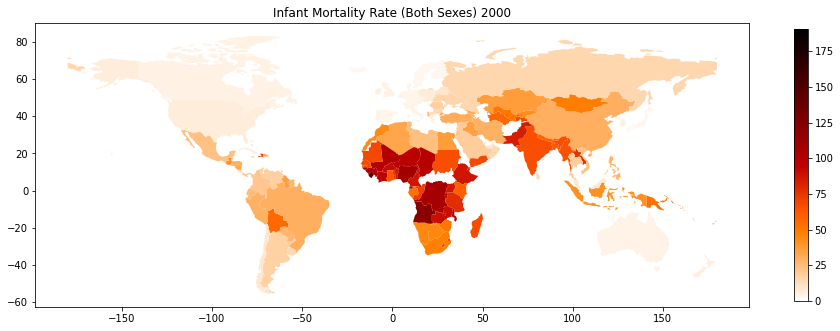

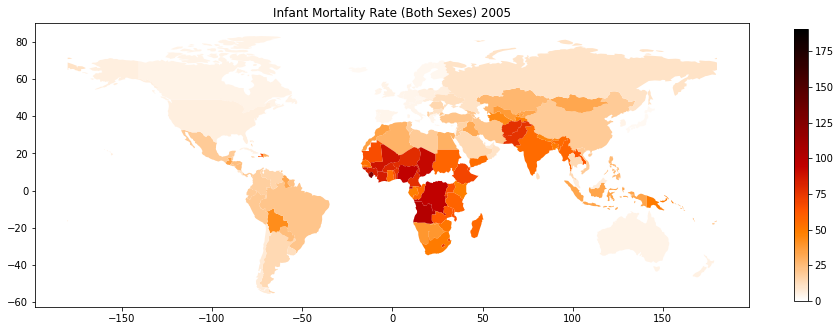

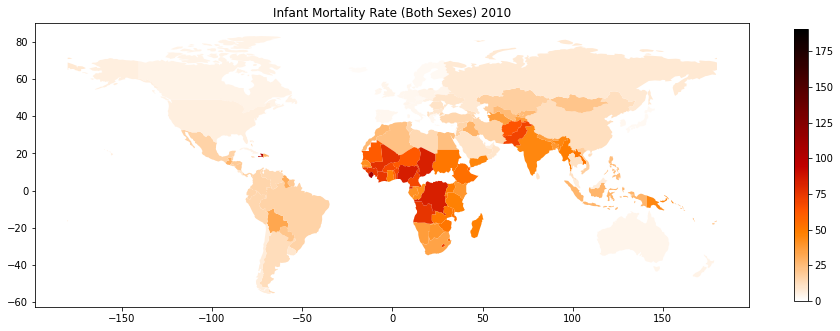

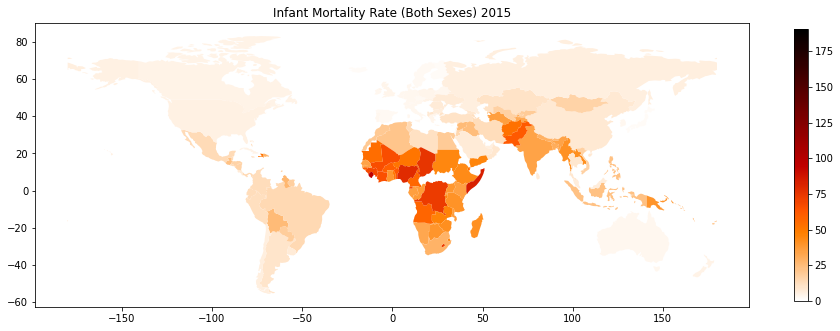

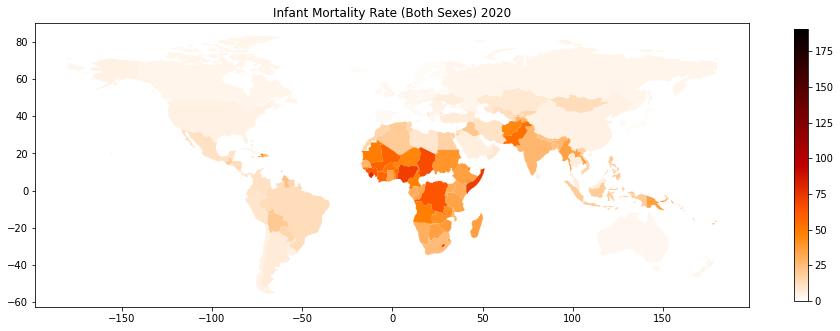

In [54]:
vmin, vmax = 0, df_1990_2020.mort_rate_both.max()
for yr in range(1990, 2021, 5):
    gdf = gpd.GeoDataFrame(df_1990_2020[df_1990_2020.year == yr])
    ax = gdf.plot(kind='geo', column='mort_rate_both', cmap='gist_heat_r', legend=True, legend_kwds={'shrink': 0.5}, figsize=(16,10), vmin=vmin, vmax=vmax)
    ax.set_title(f'Infant Mortality Rate (Both Sexes) {yr}')

From 1990 to 2020 we see infant mortality rate has gone down globally, with some countries having higher rates (noticeably parts of Africa and South Asia).

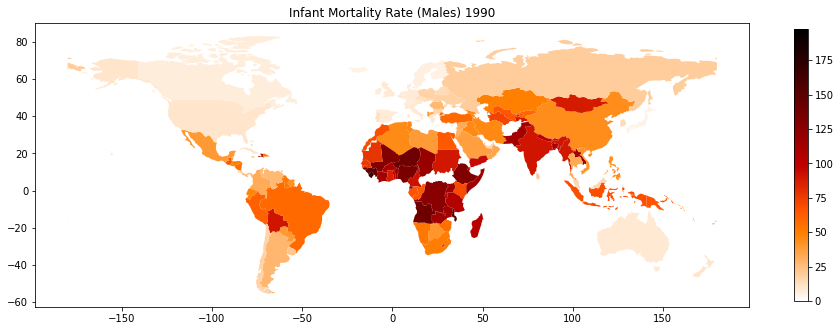

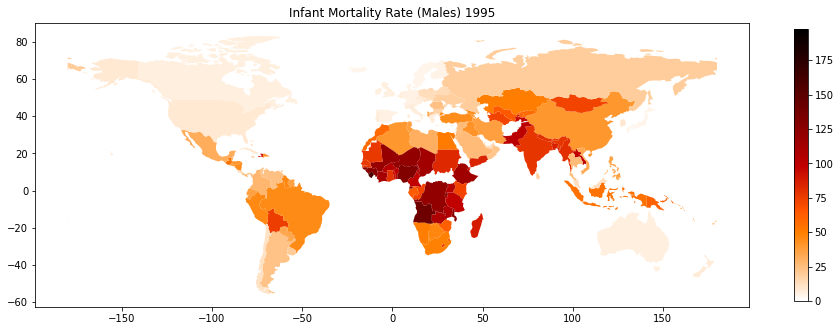

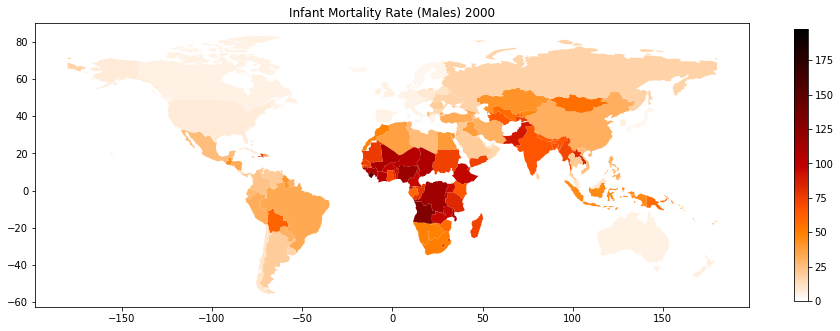

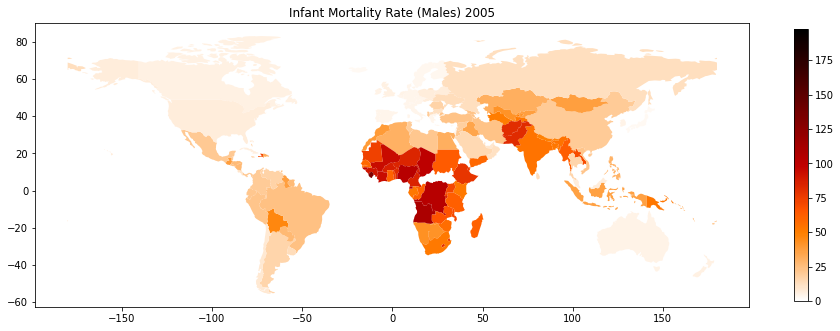

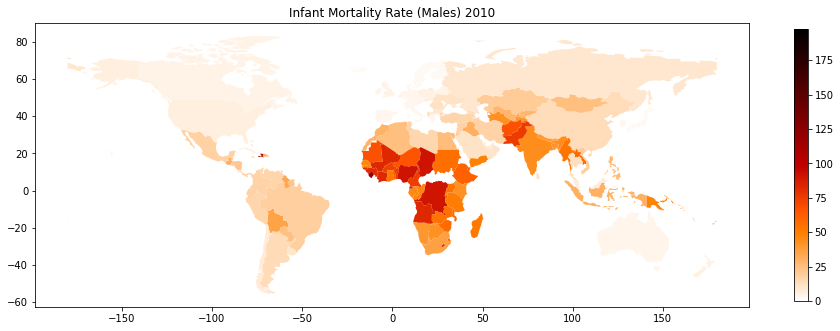

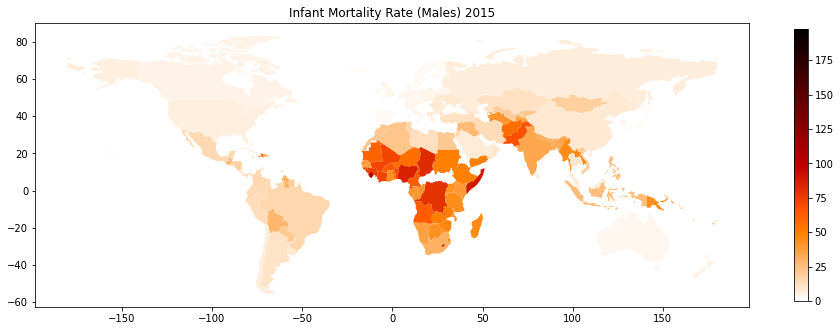

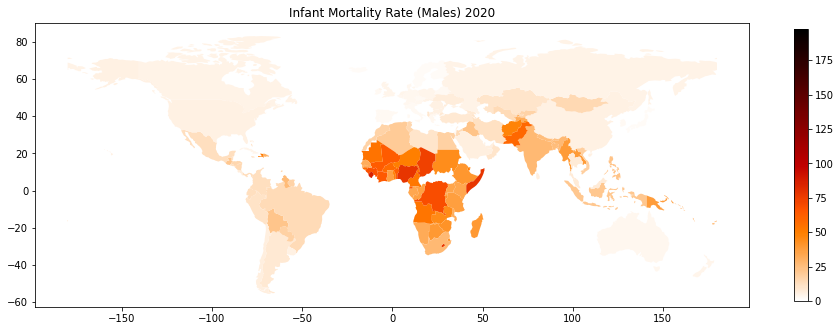

In [55]:
vmin, vmax = 0, df_1990_2020.mort_rate_male.max()
for yr in range(1990, 2021, 5):
    gdf = gpd.GeoDataFrame(df_1990_2020[df_1990_2020.year == yr])
    ax = gdf.plot(kind='geo', column='mort_rate_male', cmap='gist_heat_r', legend=True, legend_kwds={'shrink': 0.5}, figsize=(16,10), vmin=vmin, vmax=vmax)
    ax.set_title(f'Infant Mortality Rate (Males) {yr}')

We see that the choloropleths for male infant mortality rate does not appear to have any noticeable difference from the general infant mortality rate.

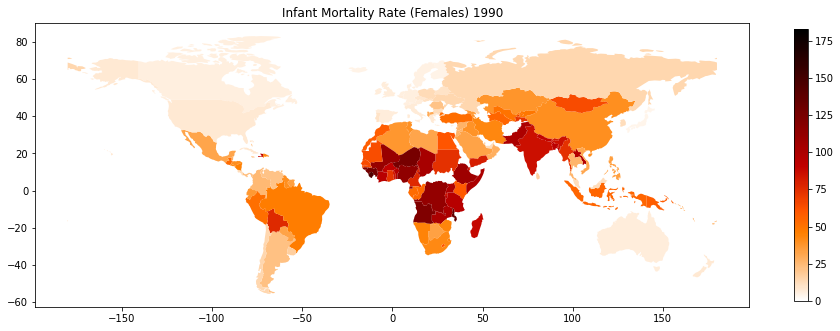

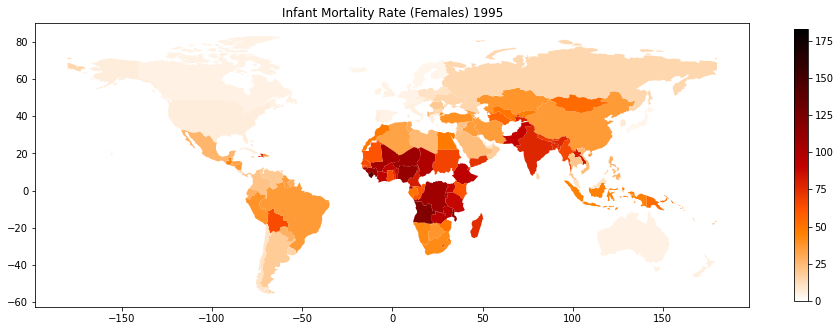

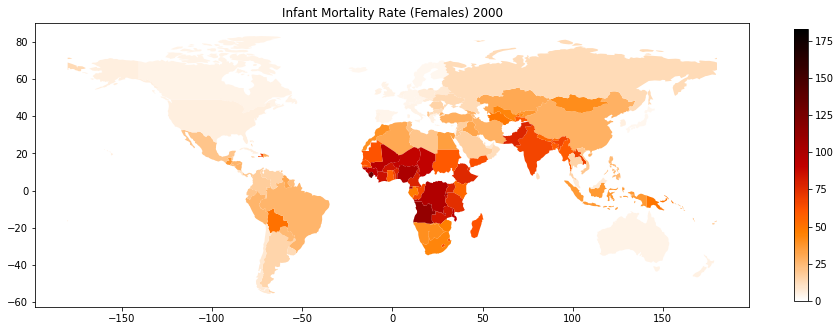

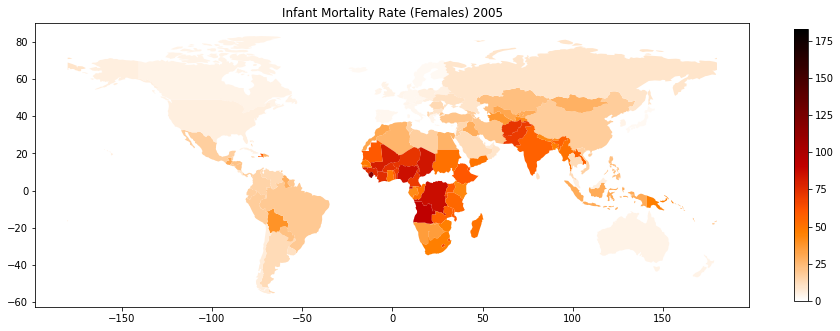

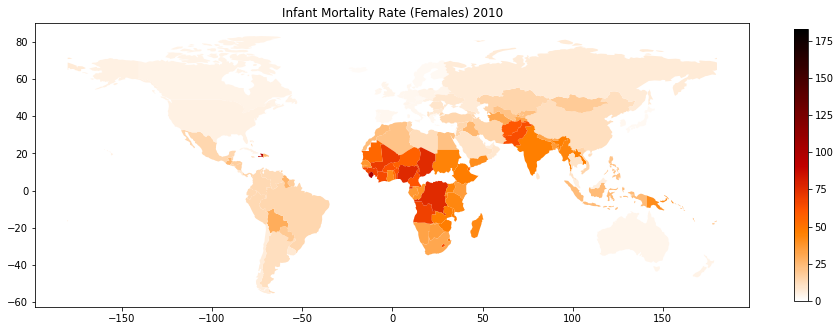

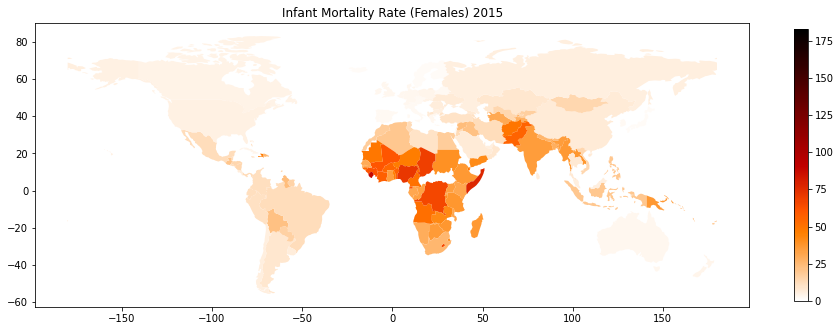

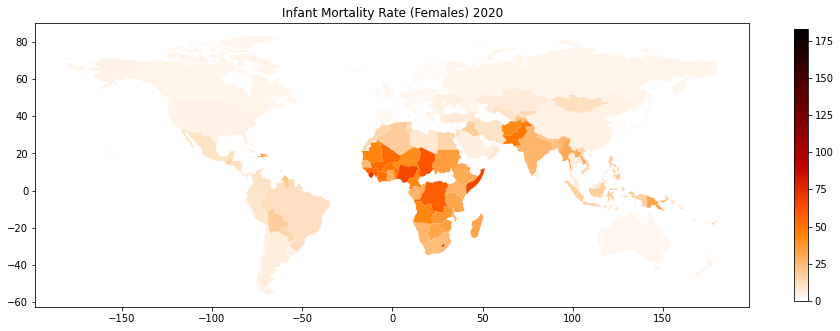

In [56]:
vmin, vmax = 0, df_1990_2020.mort_rate_fem.max()
for yr in range(1990, 2021, 5):
    gdf = gpd.GeoDataFrame(df_1990_2020[df_1990_2020.year == yr])
    ax = gdf.plot(kind='geo', column='mort_rate_fem', cmap='gist_heat_r', legend=True, legend_kwds={'shrink': 0.5}, figsize=(16,10), vmin=vmin, vmax=vmax)
    ax.set_title(f'Infant Mortality Rate (Females) {yr}')

We see that the choloropleths for female infant mortality rate does not appear to have any noticeable difference from the prior chloropleths.

# III. Results

**Does increasing GDP per capita correlate to a decrease in infant mortality rates?**

A: We saw that for almost all countries, increasing GDP per capita correlated with a decrease in infant mortality rates.

#### Sub questions: 
- How does this relationship change yearly from 1990 - 2020? 

A: The negative correlation carried on yearly since as years increased, GDP per capita increased and infant mortality rate decreased.

- From 1990 - 2020, are there countries where GDP per capita is better or worse at predicting infant mortality than the average?

A: Almost all countries had a very strong negative correlation between GDP per capita and infant mortality rate, except for Fiji and Lesotho.

- Does child sex and global region affect the correlation between GDP per capita and infant mortality rates?

A: Similar to the question above, because almost all countries had a very negative correlation, global region did not play a big role in affecting the correlation itself. The trends for different sexes were also consistent with each other.

# Ethics & Privacy

# I. Ethics & Bias

**How appropriate is using the given metrics to answer our question?**

Our dataset includes statistics for 190 / 195 (approximately 97%) countries in the world which shows that our data will accurately measure information across the world. This dataset is also based on quantitative data that does not hinder from subjectivity or any personally idenitfable information. Our questions rely on the variables of infant mortality and gdp per capita, which are both measured and provided in the datasets we collected from the World Bank.

**How much accuracy do we expect for different observations given the data we use?**

Our data is from the World Bank that uses internationally compiled statistics provided by member countries. The accuracy of our data relies on the member countries systems to provide and present the data. As the data did not have reports of infant mortality and gdp per capita for all years reported in the dataset, we were required to omit those years from our analysis, decreasing the accuracy to conclude observations on all time as the time frame of our data shortened. That is why, given our data and the time frame it uses, the relationship for the observations between 1990 and 2020 are most accurate. Therfore, we explored that specific relationship over that time period in our exploratory analysis to see how our data and results are reflected by that analysis. Also, as all observations were reported yearly for each country in regards to gender, we were able to accurately explore how gender may affect the correlations of our main findings.

**What could people misinterpret about the analysis, and how could those misunderstandings change peoples' perceptions of the subject countries?**

Correlation between infant mortality and GDP per captia does not imply causation. GDP per capita for a country may not be the direct cause of infant mortality, but the analysis might cause the misunderstanding that these metrics show a direct causal relationship. It may lead to changing people's perceptions that those countries that do suffer from higher infant mortality rates must also suffer from lower GDP, regardless of the other confounding factors that affect both.

# II. Privacy

**Are there any privacy or terms of use issues with the data you proposed?**

As the data we propose to use are from World Bank datasets, the data is available for public use set by the terms of World Bank and its users. Therefore, the terms of use allow us to openly use the data in our project. In terms of privacy, since the data we use collect information about GDP, gender, and infant mortality rates at a country-wide level, no personally identifiable information is present to violate any individual privacy concerns.

# Conclusion & Discussion

Our project sought to verify whether increasing GDP per capita correlates to a decrease in infant mortality rates. Upon verifying this we further analyzed how this correlation might have changed yearly from 1990 to 2020, whether certain countries saw GDP per capita as a better/worse predictor of infant mortality compared to others, and whether a child's sex and global region affects this correlation. To perform our analysis we use data from the world bank (listed in the Datasets section above) which provides information on GDP per capita and infant mortality rates (for both male and female) across 190 countries for every year from 1960 to 2020. But because not all countries provided data for older dates, we performed most of our analysis only on data from 1990 to 2020.

We clearly identified a negative correlation between GDP per capita and infant mortality rates over time using a 3D scatter plot that compared infant mortality rates with both GDP per capita and year, verifying our original hypothesis. This scatter plot also made it apparent that from 1990 to 2020, this negative correlation persisted every year. This was further reinforced by line plots showing that for every year, the global infant mortality rate decreased whereas global GDP per capita typically increased. Chloropleths and histograms of these features plotted every 5 years from 1990 to 2020 also reflected the same development for individual countries. GDP per capita proved to be a strong predictor of infant mortality rate for almost all countries, with the exception of Lesotho and Fiji, seen by calculating their Pearson correlations from 1990 to 2020. Other studies have identified lack of clean water or malnurtrition as contributing factors to Lesotho and Fiji's increased infant mortality rates (sources below). An infant's sex and a country's global region played little role in this correlation. We found that despite male infants having a higher mortality rate globally, the negative trend was the same for both genders, and global region had no effect on the correlation as seen in our chloropleths.

Limitations of our work include that we did not explore the large variety of variables that come from increasing GDP per capita which may be the true causes of the decreased infant mortality rates, though we note that this area has been studied before and many variables such as sanitation and education have been identified. And as seen by the the results of our data analysis, generally seeking to improve GDP per capita is a valid focus if trying to reduce infant mortality rates in society.

Sources for Lesotho and Fiji:
- https://uaps2015.princeton.edu/papers/151019
- https://borgenproject.org/10-facts-about-life-expectancy-in-fiji/

# Team Contributions

Steven Tsan
- Gathered Datasets, Data Cleaning, Data Distribution, Conclusion & Discussion, Video

Nandini Kapa
- Dataset Descriptions, Research Question/Sub-Questions, Outlier Checks, Data Ethics & Privacy, Video

Jeremy Luong
- Dataset Descriptions, Background & Prior Work, Data Setup, Results, Video

Andrew Lee
- Gathered Datasets, Overview, Developed Hypothesis, Data Trends and Correlations, Video